In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

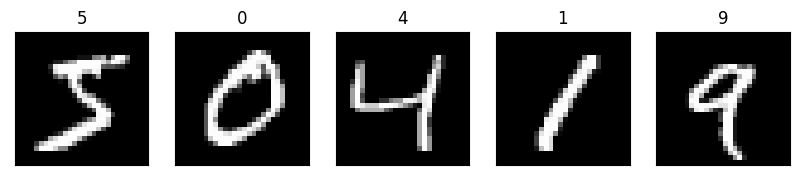

In [23]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False,
			 sharey=True, figsize=(10, 4))
for i in range(5):
	axes[i].set_title(y_train[i])
	axes[i].imshow(X_train[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [41]:
# Convert y_train into one-hot format 
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

# Convert y_test into one-hot format 
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

# Train the Neural Network model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

predictions = model.predict(X_test)

Epoch 1/5
1875/1875 [==============================] - 2s 857us/step - loss: 0.5344 - acc: 0.8397 - val_loss: 0.4929 - val_acc: 0.8632
Epoch 2/5
1875/1875 [==============================] - 2s 811us/step - loss: 0.5209 - acc: 0.8451 - val_loss: 0.5255 - val_acc: 0.8483
Epoch 3/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.5219 - acc: 0.8466 - val_loss: 0.5145 - val_acc: 0.8527
Epoch 4/5
1875/1875 [==============================] - 2s 818us/step - loss: 0.4889 - acc: 0.8576 - val_loss: 0.4743 - val_acc: 0.8640
Epoch 5/5
313/313 [==============================] - 0s 492us/step


In [42]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/mul' defined at (most recent call last):
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_19908\3631765273.py", line 1, in <cell line: 1>
      score = model.evaluate(X_test, y_test, verbose = 0)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1667, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 5544, in categorical_crossentropy
      return -tf.reduce_sum(target * tf.math.log(output), axis)
Node: 'categorical_crossentropy/mul'
Incompatible shapes: [32,10] vs. [32,10,10,10,10]
	 [[{{node categorical_crossentropy/mul}}]] [Op:__inference_test_function_94311]